In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import matplotlib
matplotlib.rcParams['font.family'] ='Malgun Gothic'
matplotlib.rcParams['axes.unicode_minus'] =False
from tqdm import tqdm

In [6]:
energy = pd.read_csv('C:/Users/user/github/Data/energy/train.csv', encoding='cp949')

In [7]:
solar = pd.read_csv('C:\\Users\\user\\github\\Data\\capstone\\weather/solar_power_2204.csv')

In [8]:
solar['datetime'] = pd.to_datetime(solar['datetime'])
solar.target.replace(65535.0, solar.target.mean(), inplace=True)
solar['month'] = solar.datetime.dt.month
solar['hour'] = solar.datetime.dt.hour
solar['year'] = solar.datetime.dt.year
solar['day'] = solar.datetime.dt.day

solar_eda = solar.groupby(['year','month','day','hour']).mean().reset_index()
solar_eda[['year','month','day','hour']] = solar_eda[['year','month','day','hour']].astype('str')
solar_eda['date'] = (solar_eda.year + '-' + solar_eda.month + '-' + solar_eda.day + ' ' + solar_eda.hour + ':00')
solar_eda.date = pd.to_datetime(solar_eda.date)

In [9]:
solar_eda = solar_eda.set_index('date')
solar_eda = solar_eda.fillna(0)

In [10]:
ee = solar.groupby(['hour']).mean().target

In [11]:
ee[:7] = 0

In [12]:
ee[20:] = 0

In [13]:
ee = ee * 2.5

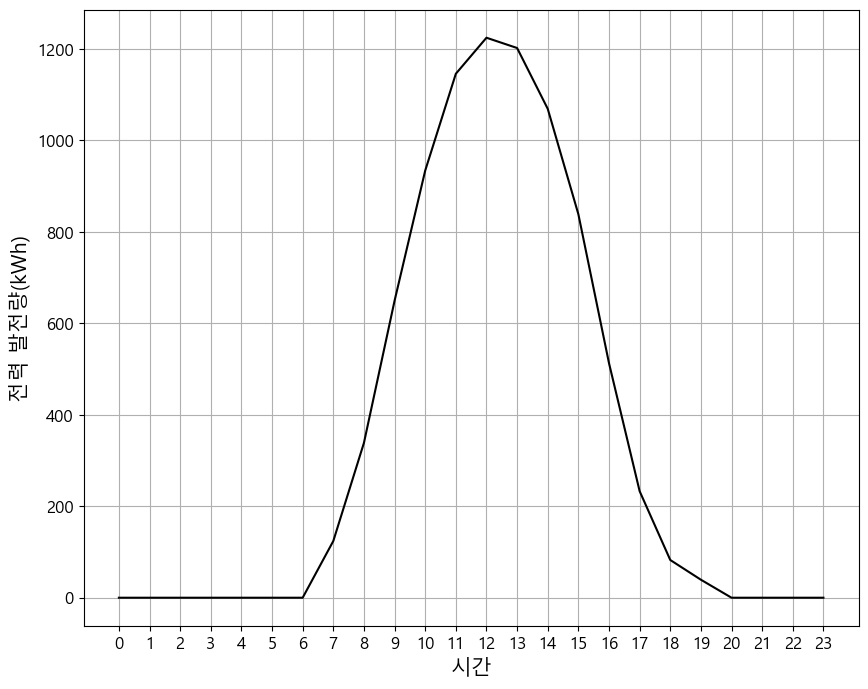

In [14]:
plt.figure(figsize=(10,8))
plt.plot(ee, color = 'k')
plt.grid(True)
plt.yticks(fontsize = 12)
plt.xticks(np.arange(0,24,1) , fontsize = 12)
plt.xlabel('시간', fontsize = 15)
plt.ylabel('전력 발전량(kWh)', fontsize = 15)
plt.show()

In [15]:
df = pd.read_csv('C:/Users/user/github/Data/energy/train.csv', encoding='cp949')

In [16]:
df.date_time = pd.to_datetime(df.date_time)

In [17]:
eda_df = df.copy()

eda_df['month'] = 0
eda_df['hour'] = 0
eda_df['year'] = 0
eda_df['day'] = 0
eda_df['요일'] = 0

In [18]:
days = ['월요일', '화요일', '수요일', '목요일', '금요일', '토요일', '일요일']

In [19]:
for i in tqdm(range(len(eda_df))):
    eda_df['month'][i] = eda_df.date_time[i].month
    eda_df['hour'][i] = eda_df.date_time[i].hour
    eda_df['year'][i] = eda_df.date_time[i].year
    eda_df['day'][i] = eda_df.date_time[i].day
    eda_df['요일'][i] = days[eda_df.date_time[i].weekday()]

100%|██████████| 122400/122400 [01:28<00:00, 1386.51it/s]


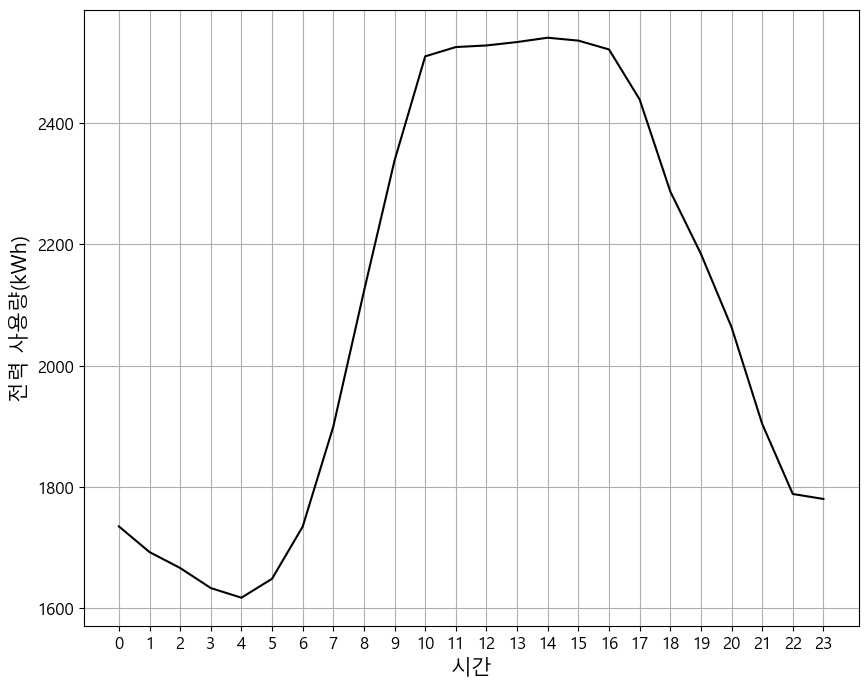

In [20]:
qq = eda_df[eda_df['태양광보유'] == 0].groupby(['hour']).mean()['전력사용량(kWh)']
plt.figure(figsize=(10,8))
plt.plot(qq, color = 'k')
plt.grid(True)
plt.yticks(fontsize = 12)
plt.xticks(np.arange(0,24,1) , fontsize = 12)
plt.xlabel('시간', fontsize = 15)
plt.ylabel('전력 사용량(kWh)', fontsize = 15)
plt.show()

In [21]:
time = [11, 13, 14, 15, 16, 17, 18, 19]

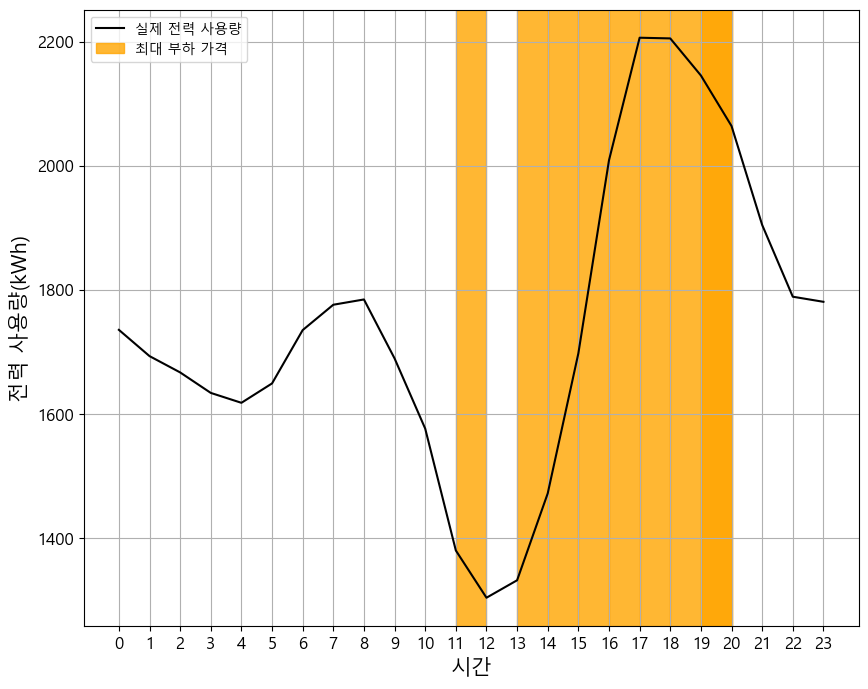

In [22]:
plt.figure(figsize=(10,8))
plt.plot(qq-ee, color = 'k', label = '실제 전력 사용량')
plt.grid(True)
plt.yticks(fontsize = 12)
plt.xticks(np.arange(0,24,1) , fontsize = 12)
plt.xlabel('시간', fontsize = 15)
plt.ylabel('전력 사용량(kWh)', fontsize = 15)
for i in time:
    plt.axvspan(i, i+1, alpha=0.8, color='orange')
    if i == time[-1]:
        plt.axvspan(i, i+1, alpha=0.8, color='orange', label = '최대 부하 가격')
plt.legend()
plt.show()

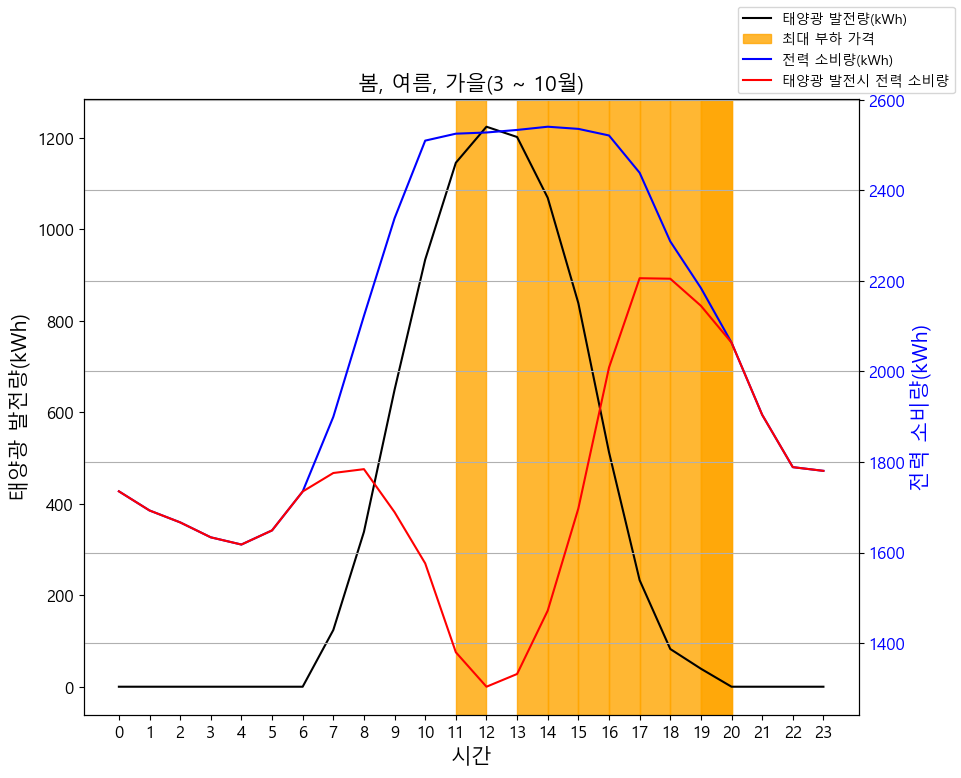

In [23]:
fig, ax1 = plt.subplots(figsize=(10, 8))

ax1.set_xlabel('시간', fontsize=15)
ax1.set_ylabel('태양광 발전량(kWh)', color='k', fontsize=15)
ax1.plot(ee, color='k', label='태양광 발전량(kWh)')
ax1.tick_params(axis='y', labelcolor='k', labelsize=12)
ax1.set_xticks(np.arange(0, 24, 1))
ax1.set_xticklabels(np.arange(0, 24, 1), fontsize=12)
ax1.set_title('봄, 여름, 가을(3 ~ 10월)', fontsize=15)

ax2 = ax1.twinx()

ax2.set_ylabel('전력 소비량(kWh)', color='b', fontsize=15)
ax2.plot(qq, color='b', label='전력 소비량(kWh)')
ax2.tick_params(axis='y', labelcolor='b', labelsize=12)

plt.plot(qq-ee, color='r', label='태양광 발전시 전력 소비량')


for i in time:
    ax1.axvspan(i, i+1, alpha=0.8, color='orange')
    if i == time[-1]:
        ax1.axvspan(i, i+1, alpha=0.8, color='orange', label = '최대 부하 가격')

plt.grid(True)
fig.legend()
plt.show()

In [24]:
time2 = [9, 10, 11, 16, 17, 18, 19]

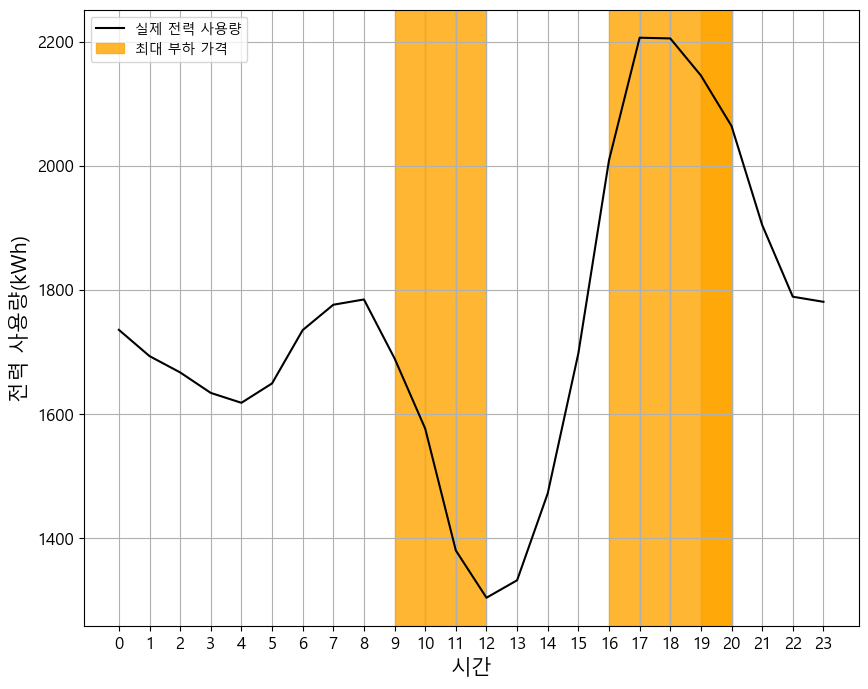

In [25]:
plt.figure(figsize=(10,8))
plt.plot(qq-ee, color = 'k', label = '실제 전력 사용량')
plt.grid(True)
plt.yticks(fontsize = 12)
plt.xticks(np.arange(0,24,1) , fontsize = 12)
plt.xlabel('시간', fontsize = 15)
plt.ylabel('전력 사용량(kWh)', fontsize = 15)
for i in time2:
    plt.axvspan(i, i+1, alpha=0.8, color='orange')
    if i == time2[-1]:
        plt.axvspan(i, i+1, alpha=0.8, color='orange', label = '최대 부하 가격')
plt.legend()
plt.show()

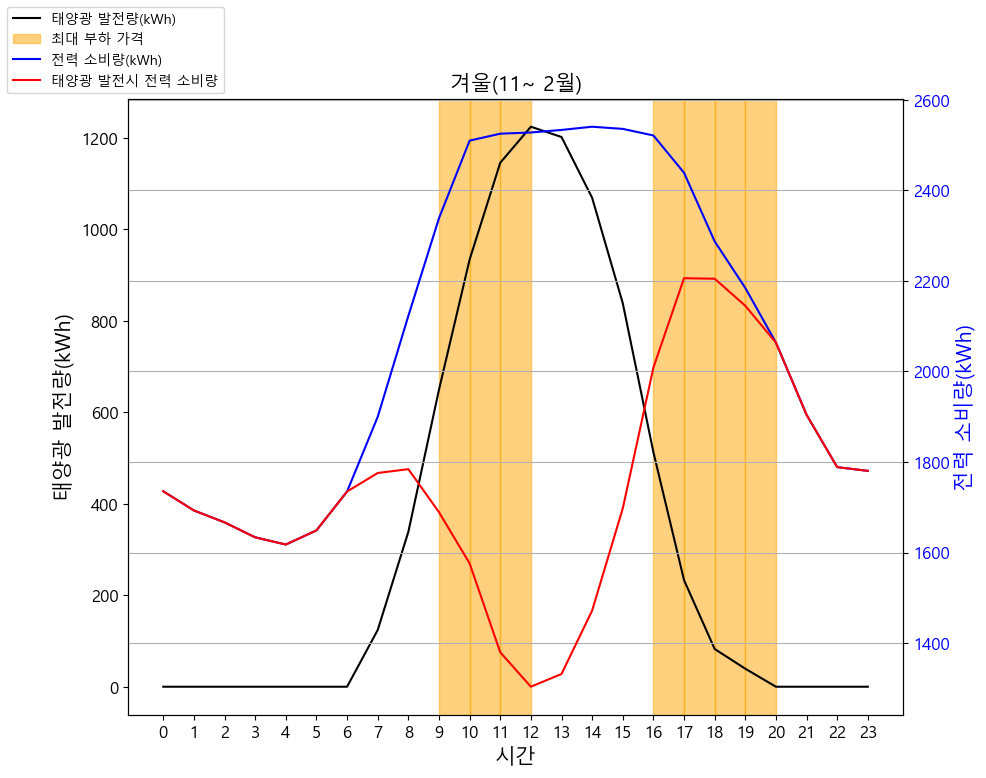

In [26]:
fig, ax1 = plt.subplots(figsize=(10, 8))

ax1.set_xlabel('시간', fontsize=15)
ax1.set_ylabel('태양광 발전량(kWh)', color='k', fontsize=15)
ax1.plot(ee, color='k', label='태양광 발전량(kWh)')
ax1.tick_params(axis='y', labelcolor='k', labelsize=12)
ax1.set_xticks(np.arange(0, 24, 1))
ax1.set_xticklabels(np.arange(0, 24, 1), fontsize=12)
ax1.set_title('겨울(11~ 2월)', fontsize=15)

ax2 = ax1.twinx()

ax2.set_ylabel('전력 소비량(kWh)', color='b', fontsize=15)
ax2.plot(qq, color='b', label='전력 소비량(kWh)')
ax2.tick_params(axis='y', labelcolor='b', labelsize=12)

plt.plot(qq-ee, color='r', label='태양광 발전시 전력 소비량')

for i in time2:
    if i == time2[-1]:
        ax1.axvspan(i, i+1, alpha=0.5, color='orange', label='최대 부하 가격')
    else:
        ax1.axvspan(i, i+1, alpha=0.5, color='orange')


fig.legend(loc='upper left')
plt.grid(True)
plt.show()


In [27]:
sell = {
    '시간' : ['경부하', '중간부하', '최대부하'],
    '여름철' : ['84.8', '137.7', '219.8'],
    '봄 가을철' : ['84.8','107.3','138.0'],
    '겨울철' : ['91.8', '137.9', '195.4']
}

In [28]:
sell = pd.DataFrame(sell)

In [29]:
sell

,시간,여름철,봄 가을철,겨울철
0,경부하,84.8,84.8,91.8
1,중간부하,137.7,107.3,137.9
2,최대부하,219.8,138.0,195.4


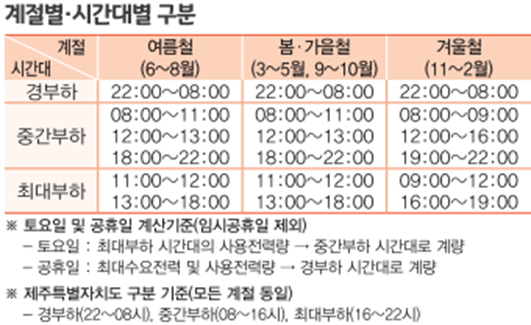

In [30]:
winter_max = [9, 10, 11, 16, 17, 18]
winter_mid = [8, 12, 13, 14, 15, 19, 20, 21]
winter_min = [0, 1, 2, 3, 4, 5, 6, 7, 22, 23]

spring_max = [11, 13, 14, 15, 16, 17]
spring_mid = [9, 10, 12, 18, 19, 20, 21]
spring_min = [0, 1, 2, 3, 4, 5, 6, 7, 22, 23]

In [31]:
summer_price = [84.8, 84.8, 84.8, 84.8, 84.8,
                84.8, 84.8, 84.8, 137.7, 137.7,
                137.7, 219.8, 137.7, 219.8, 219.8,
                219.8, 219.8, 219.8, 219.8, 137.7,
                137.7, 137.7, 84.8, 84.8]

In [32]:
normal_price = [84.8, 84.8, 84.8, 84.8, 84.8,
                84.8, 84.8, 84.8, 107.3, 107.3,
                107.3, 138, 107.3, 138, 138,
                138, 138, 138, 138, 107.3,
                107.3, 107.3, 84.8, 84.8]

In [33]:
winter_price = [91.8, 91.8, 91.8, 91.8, 91.8, 
                91.8, 91.8, 91.8, 137.9, 195.4,
                195.4, 195.4, 137.9, 137.9, 137.9,
                137.9, 195.4, 195.4, 195.4, 195.4,
                137.9, 137.9, 91.8, 91.8]

In [34]:
np.dot(winter_price, (qq-ee))

5742228.589568261

In [35]:
np.dot(winter_price, qq)

7101001.773278682

In [36]:
np.dot(winter_price, qq) - np.dot(winter_price, (qq - ee))

1358773.1837104205

---
# 최적화 - 겨울

In [37]:
import pulp

In [38]:
# 시간당 전력 생산량
production = ee

# 시간당 전력 사용량
consumption = qq
# 시간당 전력 가격
price = winter_price
# 모델 생성
model = pulp.LpProblem("Power Cost Minimization", pulp.LpMinimize)

# 변수 생성
use = [pulp.LpVariable("use{}".format(i), 0) for i in range(24)]
generated_use = [pulp.LpVariable("gen_use{}".format(i), 0) for i in range(24)]

# 목적함수 생성
total_cost = pulp.lpSum([(consumption[i] - generated_use[i]) * price[i] for i in range(24)])
model += total_cost

# 제약조건 생성
for i in range(24):
    model += generated_use[i] <= production[i]
    if i > 0:
        model += generated_use[i] <= pulp.lpSum([generated_use[j] for j in range(i)])
    model += generated_use[i] <= use[i]
    model += generated_use[i] >= pulp.lpSum([generated_use[j] for j in range(i)])
    model += use[i] >= generated_use[i]
    model += use[i] <= consumption[i]
    
model += pulp.lpSum(generated_use) == pulp.lpSum(consumption)
    
# 문제 풀이
model.solve()

# 결과 출력
for i in range(24):
    print("시간 {}: 생산량 = {:.2f}, 소비량 = {:.2f}, 사용량 = {:.2f}, 발전된 전력 사용량 = {:.2f}".format(i, production[i], consumption[i], use[i].value(), generated_use[i].value()))

print("전체 요금: {:.2f}".format(pulp.value(model.objective)))


시간 0: 생산량 = 0.00, 소비량 = 1735.23, 사용량 = 0.00, 발전된 전력 사용량 = 0.00
시간 1: 생산량 = 0.00, 소비량 = 1692.90, 사용량 = 0.00, 발전된 전력 사용량 = 0.00
시간 2: 생산량 = 0.00, 소비량 = 1666.61, 사용량 = 0.00, 발전된 전력 사용량 = 0.00
시간 3: 생산량 = 0.00, 소비량 = 1633.57, 사용량 = 0.00, 발전된 전력 사용량 = 0.00
시간 4: 생산량 = 0.00, 소비량 = 1617.61, 사용량 = 0.00, 발전된 전력 사용량 = 0.00
시간 5: 생산량 = 0.00, 소비량 = 1648.87, 사용량 = 0.00, 발전된 전력 사용량 = 0.00
시간 6: 생산량 = 0.00, 소비량 = 1734.80, 사용량 = 0.00, 발전된 전력 사용량 = 0.00
시간 7: 생산량 = 124.03, 소비량 = 1899.73, 사용량 = 0.00, 발전된 전력 사용량 = 0.00
시간 8: 생산량 = 338.65, 소비량 = 2122.85, 사용량 = 0.00, 발전된 전력 사용량 = 0.00
시간 9: 생산량 = 649.47, 소비량 = 2338.62, 사용량 = 0.00, 발전된 전력 사용량 = 0.00
시간 10: 생산량 = 934.12, 소비량 = 2510.15, 사용량 = 0.00, 발전된 전력 사용량 = 0.00
시간 11: 생산량 = 1145.87, 소비량 = 2525.47, 사용량 = 0.00, 발전된 전력 사용량 = 0.00
시간 12: 생산량 = 1224.68, 소비량 = 2528.12, 사용량 = 0.00, 발전된 전력 사용량 = 0.00
시간 13: 생산량 = 1202.18, 소비량 = 2533.75, 사용량 = 0.00, 발전된 전력 사용량 = 0.00
시간 14: 생산량 = 1069.22, 소비량 = 2540.87, 사용량 = 0.00, 발전된 전력 사용량 = 0.00
시간 15: 생산량 = 838.69, 소비량 = 253

In [39]:
import pyswarms as ps

In [40]:
power_generation = ee # 시간당 태양광 발전량 리스트
power_usage = qq # 시간당 공장에서 전력을 사용하는 양 리스트
power_price = winter_price # 시간당 전력 가격 리스트

def minimize_cost(x):
    n_particles = x.shape[0]
    costs = np.zeros(n_particles)

    for i in range(n_particles):
        total_cost = 0
        accumulated_gen = 0

        for hour in range(24):
            gen_hour = power_generation[hour]
            usage_hour = power_usage[hour]
            price_hour = power_price[hour]

            accumulated_gen += gen_hour
            gen_used = min(accumulated_gen, usage_hour, x[i, hour])
            accumulated_gen -= gen_used

            total_cost += (usage_hour - gen_used) * price_hour

        costs[i] = total_cost

    return costs


# PSO 알고리즘 설정
options = {'c1': 0.5, 'c2': 0.3, 'w': 0.9}
bounds = (np.zeros(24), np.array(power_usage))
optimizer = ps.single.GlobalBestPSO(n_particles=50, dimensions=24, options=options, bounds=bounds)

# 최적화 실행
cost, pos = optimizer.optimize(minimize_cost, iters=1000)

2023-05-28 02:48:26,628 - pyswarms.single.global_best - INFO - Optimize for 1000 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}
pyswarms.single.global_best: 100%|██████████|1000/1000, best_cost=5.52e+6
2023-05-28 02:48:33,257 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 5520576.808299805, best pos: [ 660.09065692  419.03834378 1054.80070828  918.76691735  816.4865592
  929.68134019  848.81110779  553.85016483  856.84752519  812.1077115
 1341.13107768 1505.34610407    9.21529938  318.83443011  140.92968297
   10.98097602  836.29614692 1871.41049786 1415.75547004 1499.26693315
 1104.66134378  743.03941242  449.91193931 1032.24940634]


In [41]:
ee_2 = round(ee, 2)

In [42]:
qq_2 = round(qq,2)

In [43]:
(np.zeros(24), np.array(power_generation))

(array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0.]),
 array([   0.        ,    0.        ,    0.        ,    0.        ,
           0.        ,    0.        ,    0.        ,  124.03086265,
         338.65378978,  649.46583908,  934.12122216, 1145.87171128,
        1224.68194677, 1202.18163322, 1069.21578177,  838.69461399,
         512.95469621,  233.04044732,   82.51842252,   39.37393395,
           0.        ,    0.        ,    0.        ,    0.        ]))

In [92]:
# 변수와 데이터 정의
power_generation = ee_2 # 시간당 태양광 발전량 리스트
power_usage = qq_2 # 시간당 공장에서 전력을 사용하는 양 리스트
power_price = winter_price # 시간당 전력 가격 리스트

# 목적 함수 정의
def minimize_cost(x):
    n_particles = x.shape[0]
    costs = np.zeros(n_particles)

    for i in range(n_particles):
        total_cost = 0
        accumulated_gen = 0

        for hour in range(24):
            gen_hour = power_generation[hour]
            usage_hour = power_usage[hour]
            price_hour = power_price[hour]

            accumulated_gen += gen_hour
            gen_used = min(accumulated_gen, usage_hour, x[i, hour])
            accumulated_gen -= gen_used

            total_cost += (usage_hour - gen_used) * price_hour

        costs[i] = total_cost

    return costs

# PSO 알고리즘 설정
options = {'c1': 0.1, 'c2': 0.3, 'w': 1.5}
bounds = (np.zeros(24), np.array(power_usage))
optimizer = ps.single.GlobalBestPSO(n_particles=50, dimensions=24, options=options, bounds=bounds)

# 최적화 실행
cost, pos = optimizer.optimize(minimize_cost, iters=2000)

print(f"Minimum cost: {cost}")
print(f"Power usage schedule: {pos}")

# 시간당 발전된 전력 사용량 계산 및 출력
accumulated_gen = 0
hourly_gen_used = np.zeros(24)
for hour in range(24):
    gen_hour = power_generation[hour]
    usage_hour = power_usage[hour]
    accumulated_gen += gen_hour
    gen_used = min(accumulated_gen, usage_hour, pos[hour])
    accumulated_gen -= gen_used
    hourly_gen_used[hour] = gen_used

2023-05-28 03:38:04,285 - pyswarms.single.global_best - INFO - Optimize for 2000 iters with {'c1': 0.1, 'c2': 0.3, 'w': 1.5}
pyswarms.single.global_best: 100%|██████████|2000/2000, best_cost=5.52e+6
2023-05-28 03:38:18,103 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 5516709.8144931905, best pos: [1045.60867802 1461.39864019  132.34339359  587.63736671 1076.39958645
 1000.40945764 1195.51369047  330.99499262 1476.41439693  187.1741251
 1659.66196068  219.56550045   82.32127583   87.5         200.48657265
   42.38609053 1346.96422958 1712.18239692 2264.98642925 1672.71347929
 1266.32865593  433.7462844   952.1104673    51.0709003 ]


Minimum cost: 5516709.8144931905
Power usage schedule: [1045.60867802 1461.39864019  132.34339359  587.63736671 1076.39958645
 1000.40945764 1195.51369047  330.99499262 1476.41439693  187.1741251
 1659.66196068  219.56550045   82.32127583   87.5         200.48657265
   42.38609053 1346.96422958 1712.18239692 2264.98642925 1672.71347929
 1266.32865593  433.7462844   952.1104673    51.0709003 ]


In [165]:
# 적합성 함수 정의
def minimize_cost(x):
    n_particles = x.shape[0]
    costs = np.zeros(n_particles)

    for i in range(n_particles):
        total_cost = 0
        accumulated_gen = 0
        total_gen_used = 0

        for hour in range(24):
            gen_hour = power_generation[hour]
            usage_hour = power_usage[hour]
            price_hour = power_price[hour]

            # 제약조건 1: 시간당 태양광 발전량 사용량은 누적 발전량까지만 가능하고, 음수가 될 수 없다.
            gen_used = min(accumulated_gen, usage_hour, x[i, hour])
            gen_used = max(0, gen_used)
            accumulated_gen += gen_hour - gen_used
            total_gen_used += gen_used

            total_cost += (usage_hour - gen_used) * price_hour

        costs[i] = total_cost

        # 제약조건 2: 태양광 발전의 전체 합은 태양광 발전량 사용량의 전체 합과 같아야 함.
        if np.sum(power_generation) != total_gen_used:
            costs[i] += 1e6  # 제약 조건을 위반한 경우 큰 페널티 부여

    return costs

# PSO 알고리즘 설정
options = {'c1': 0.1, 'c2': 0.3, 'w': 1.5}
bounds = (np.zeros(24), np.array(power_usage))
optimizer = ps.single.GlobalBestPSO(n_particles=50, dimensions=24, options=options, bounds=bounds)

# 최적화 실행
cost, pos = optimizer.optimize(minimize_cost, iters=2000)

print(f"Minimum cost: {cost}")
print(f"Power usage schedule: {pos}")

# 시간당 발전된 전력 사용량 계산 및 출력
accumulated_gen = 0
hourly_gen_used = np.zeros(24)
for hour in range(24):
    gen_hour = power_generation[hour]
    usage_hour = power_usage[hour]
    accumulated_gen += gen_hour
    gen_used = min(accumulated_gen, usage_hour, pos[hour])
    gen_used = max(0, gen_used)
    accumulated_gen -= gen_used
    hourly_gen_used[hour] = gen_used


2023-05-28 04:19:07,407 - pyswarms.single.global_best - INFO - Optimize for 2000 iters with {'c1': 0.1, 'c2': 0.3, 'w': 1.5}
pyswarms.single.global_best: 100%|██████████|2000/2000, best_cost=5.5e+6
2023-05-28 04:19:27,578 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 5503494.6834814185, best pos: [ 970.10369583   24.59380927   17.95215864 1435.40122916 1160.56832268
  913.25321329  810.43929363 1138.24131134 2084.67164009 2142.86662194
  404.43164294 1533.53355832   13.37915312  308.23994549  154.8691996
  105.11191044 2069.05987513 2207.49607126 2035.71239032  776.99326667
 1226.62345252  513.02684243 1474.85613428  303.32109561]


Minimum cost: 5503494.6834814185
Power usage schedule: [ 970.10369583   24.59380927   17.95215864 1435.40122916 1160.56832268
  913.25321329  810.43929363 1138.24131134 2084.67164009 2142.86662194
  404.43164294 1533.53355832   13.37915312  308.23994549  154.8691996
  105.11191044 2069.05987513 2207.49607126 2035.71239032  776.99326667
 1226.62345252  513.02684243 1474.85613428  303.32109561]


In [172]:
from scipy.optimize import minimize

# 시간당 태양광 발전량, 공장에서 전력을 사용하는 양, 시간당 전력 가격을 사용
power_generation = ee_2
power_usage = qq_2
power_price = winter_price

# 목적 함수 정의
def objective(x):
    return sum([(power_usage[i] - x[i]) * power_price[i] for i in range(len(x))])

# 제약 조건 정의
constraints = []
for i in range(len(power_generation)):
    # 1. 시간당 태양광 발전량 사용량은 누적 발전량까지만 가능하고, 음수가 될 수 없다.
    constraints.append({'type': 'ineq', 'fun': lambda x: np.sum(power_generation[:i+1]) - np.sum(x[:i+1])})
    # 2. 태양광 발전량 사용량은 음수가 될 수 없다.
    constraints.append({'type': 'ineq', 'fun': lambda x: x[i]})

# 초기 추측값 설정
x0 = np.zeros(len(power_generation))

# 최적화
result = minimize(objective, x0, method='SLSQP', constraints=constraints)

# 결과 출력
print(f"Minimum cost: {result.fun}")
print(f"Power usage schedule: {result.x}")


Minimum cost: -1.2696396908432169e+36
Power usage schedule: [-1.96642317e+33 -1.96642317e+33 -1.96645469e+33 -1.96642317e+33
 -1.94778561e+33 -1.94781514e+33 -1.94788181e+33 -1.94781514e+33
  5.95422984e+30  2.14871905e+33  2.14874859e+33  2.14871889e+33
 -1.20794255e+32 -3.75479660e+30 -9.34719568e+31 -1.29555650e+32
  2.14900501e+33  2.14863786e+33  2.14863802e+33  2.22390587e+33
 -1.22162734e+32 -1.22314832e+32 -1.95159312e+33  1.43729819e+32]


In [166]:
pos.sum()

23824.745833994544

In [167]:
hourly_gen_used.sum()

8394.804900710611

In [168]:
ee.sum()

8394.804900710611

In [169]:
qq.sum()

50235.2573172077

In [170]:
print(f"Minimum cost: {cost}")

print(f"Hourly generated power usage: {hourly_gen_used}")

print(f"Power usage schedule: {pos}")

Minimum cost: 5503494.6834814185
Hourly generated power usage: [   0.            0.            0.            0.            0.
    0.            0.          124.03086265  338.65378978  649.46583908
  404.43164294 1533.53355832   13.37915312  308.23994549  154.8691996
  105.11191044 2069.05987513 2207.49607126  447.15911896   39.37393395
    0.            0.            0.            0.        ]
Power usage schedule: [ 970.10369583   24.59380927   17.95215864 1435.40122916 1160.56832268
  913.25321329  810.43929363 1138.24131134 2084.67164009 2142.86662194
  404.43164294 1533.53355832   13.37915312  308.23994549  154.8691996
  105.11191044 2069.05987513 2207.49607126 2035.71239032  776.99326667
 1226.62345252  513.02684243 1474.85613428  303.32109561]


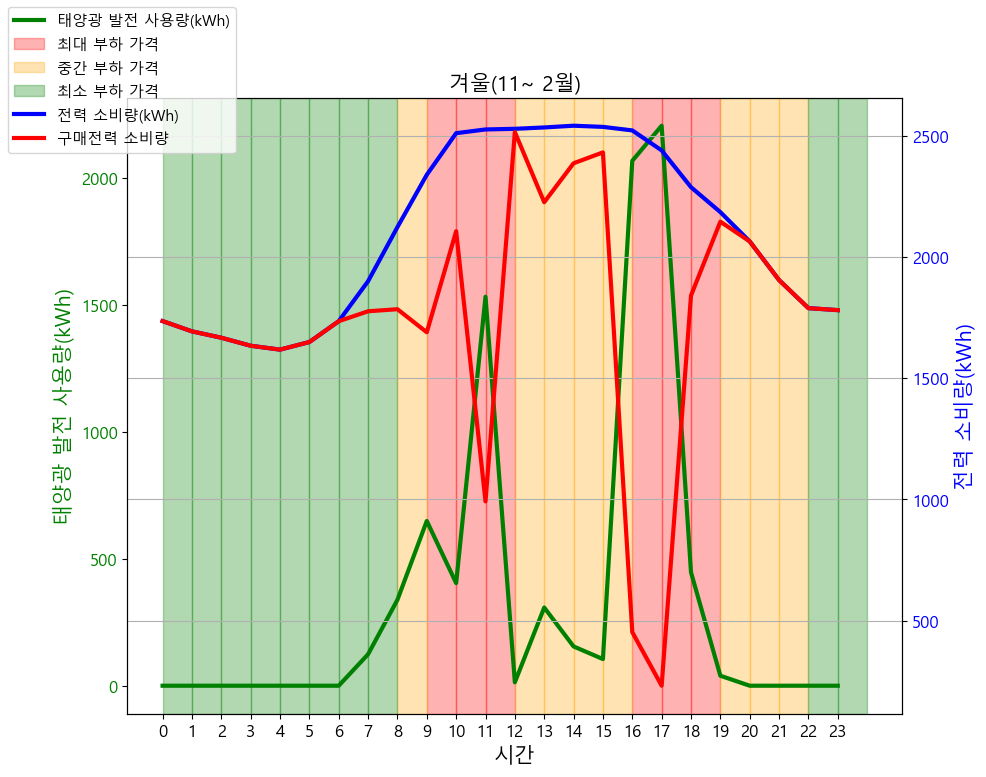

In [171]:
fig, ax1 = plt.subplots(figsize=(10, 8))

ax1.set_xlabel('시간', fontsize=15)
ax1.set_ylabel('태양광 발전 사용량(kWh)', color='green', fontsize=15)
ax1.plot(hourly_gen_used, color='green', label='태양광 발전 사용량(kWh)', linewidth = 3)
ax1.tick_params(axis='y', labelcolor='green', labelsize=12)
ax1.set_xticks(np.arange(0, 24, 1))
ax1.set_xticklabels(np.arange(0, 24, 1), fontsize=12)
ax1.set_title('겨울(11~ 2월)', fontsize=15)

ax2 = ax1.twinx()

ax2.set_ylabel('전력 소비량(kWh)', color='b', fontsize=15)
ax2.plot(qq, color='b', label='전력 소비량(kWh)', linewidth = 3)
ax2.tick_params(axis='y', labelcolor='b', labelsize=12)

plt.plot(qq-hourly_gen_used, color='r', label='구매전력 소비량', linewidth = 3)

for i in winter_max:
    if i == winter_max[-1]:
        ax1.axvspan(i, i+1, alpha=0.3, color='red', label='최대 부하 가격')
    else:
        ax1.axvspan(i, i+1, alpha=0.3, color='red')
    
for i in winter_mid:
    if i == winter_mid[-1]:
        ax1.axvspan(i, i+1, alpha=0.3, color='orange', label='중간 부하 가격')
    else:
        ax1.axvspan(i, i+1, alpha=0.3, color='orange')

for i in winter_min:
    if i == winter_min[-1]:
        ax1.axvspan(i, i+1, alpha=0.3, color='green', label='최소 부하 가격')
    else:
        ax1.axvspan(i, i+1, alpha=0.3, color='green')



fig.legend(loc='upper left',  fontsize = 11)
plt.grid(True)
plt.show()


In [51]:
ee

hour
0        0.000000
1        0.000000
2        0.000000
3        0.000000
4        0.000000
5        0.000000
6        0.000000
7      124.030863
8      338.653790
9      649.465839
10     934.121222
11    1145.871711
12    1224.681947
13    1202.181633
14    1069.215782
15     838.694614
16     512.954696
17     233.040447
18      82.518423
19      39.373934
20       0.000000
21       0.000000
22       0.000000
23       0.000000
Name: target, dtype: float64

In [52]:
import random
from deap import base, creator, tools, algorithms

In [53]:
# 변수와 데이터 정의
power_generation = ee # 시간당 태양광 발전량 리스트
power_usage = qq # 시간당 공장에서 전력을 사용하는 양 리스트
power_price = winter_price # 시간당 전력 가격 리스트

# 목적 함수 정의
def minimize_cost(individual):
    total_cost = 0
    accumulated_gen = 0

    for hour in range(24):
        gen_hour = power_generation[hour]
        usage_hour = power_usage[hour]
        price_hour = power_price[hour]

        accumulated_gen += gen_hour
        gen_used = min(accumulated_gen, usage_hour, individual[hour])
        accumulated_gen -= gen_used

        total_cost += (usage_hour - gen_used) * price_hour

    return total_cost,

# 유전 알고리즘 설정
creator.create("FitnessMin", base.Fitness, weights=(-1.0,))
creator.create("Individual", list, fitness=creator.FitnessMin)

toolbox = base.Toolbox()
toolbox.register("attr_float", random.random)
toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_float, n=24)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

toolbox.register("mate", tools.cxTwoPoint)
toolbox.register("mutate", tools.mutGaussian, mu=0, sigma=1, indpb=0.1)
toolbox.register("select", tools.selTournament, tournsize=3)
toolbox.register("evaluate", minimize_cost)

# 최적화 실행
pop = toolbox.population(n=50)
hof = tools.HallOfFame(1)
stats = tools.Statistics(lambda ind: ind.fitness.values)
stats.register("Avg", np.mean)
stats.register("Std", np.std)
stats.register("Min", np.min)
stats.register("Max", np.max)

pop, logbook = algorithms.eaSimple(pop, toolbox, cxpb=0.5, mutpb=0.2, ngen=3000, stats=stats, halloffame=hof, verbose=True)

best_individual = hof[0]
best_cost = minimize_cost(best_individual)


gen	nevals	Avg        	Std    	Min        	Max        
0  	50    	7.09967e+06	223.756	7.09912e+06	7.10015e+06
1  	31    	7.09946e+06	170.19 	7.09893e+06	7.0998e+06 
2  	35    	7.09929e+06	229.745	7.09842e+06	7.09978e+06
3  	29    	7.09911e+06	233.888	7.09842e+06	7.09946e+06
4  	29    	7.09887e+06	315.797	7.09814e+06	7.09976e+06
5  	31    	7.09857e+06	246.241	7.09814e+06	7.09909e+06
6  	25    	7.09836e+06	166.277	7.09795e+06	7.09871e+06
7  	34    	7.09824e+06	183.64 	7.09785e+06	7.09864e+06
8  	27    	7.09809e+06	196.983	7.09767e+06	7.09863e+06
9  	25    	7.09794e+06	139.859	7.09758e+06	7.09818e+06
10 	27    	7.09781e+06	203.042	7.09722e+06	7.09829e+06
11 	26    	7.09761e+06	242.891	7.09677e+06	7.0981e+06 
12 	21    	7.09744e+06	240.639	7.09677e+06	7.09788e+06
13 	28    	7.09723e+06	201.043	7.09654e+06	7.09773e+06
14 	31    	7.09703e+06	281.434	7.09623e+06	7.09788e+06
15 	34    	7.09676e+06	315.312	7.09598e+06	7.09722e+06
16 	22    	7.09655e+06	321.626	7.09598e+06	7.09734e+06
17 	34    

In [54]:
print(f"Minimum cost: {best_cost[0]}")
print(f"Power usage schedule: {best_individual}")

Minimum cost: 6528432.242179907
Power usage schedule: [5.861916832793941, 2.864579470692113, 0.6626319085995492, -10.02763752521957, 20.84529502716112, -0.5422541515182296, 17.35877211915594, 112.35754604260863, 186.91576367168864, 252.53331186019628, 254.9906107277652, 285.26153546256677, 198.02712801915544, 151.6989182309944, 177.71603894826956, 178.31238678867064, 282.62642595826344, 236.95120955392565, 262.1321220101946, 247.20259761625732, 195.56533001087007, 211.50538237444593, 152.41929848874798, 142.363696496222]


In [55]:
from scipy.optimize import linprog

In [56]:
power_generation = ee # 시간당 태양광 발전량 리스트
power_usage = qq # 시간당 공장에서 전력을 사용하는 양 리스트
power_price = winter_price # 시간당 전력 가격 리스트

# 목적 함수 계수 정의
c = np.hstack((power_price, np.zeros(24)))

# 제약 조건 정의
A_eq = []
b_eq = []

# 발전된 전력 사용량은 현재 시간까지 발전된 양만 사용할 수 있음
for i in range(24):
    A_eq.append([0] * i + [1] * (24 - i) + [-1 if j == i else 0 for j in range(24)])
    b_eq.append(power_generation[i])

# 하루에 발전된 전력은 모두 사용해야 함
A_eq.append([0]*24 + [-1]*24)
b_eq.append(-sum(power_generation))

# 전력 사용량과 전력 발전량, 전력 가격은 고정이지만, 발전된 전력 사용량은 어느 시간에 사용할지는 정할 수 있음
bounds = [(0, usage) for usage in power_usage] + [(0, None) for _ in range(24)]

# 선형 계획법 실행
res = linprog(c, A_eq=A_eq, b_eq=b_eq, bounds=bounds, method='highs')

# 결과 출력
if res.success:
    minimum_cost = res.fun
    power_usage_schedule = res.x[:24]

    print(f"Minimum cost: {minimum_cost}")
    print(f"Power usage schedule: {power_usage_schedule}")
else:
    print("Optimization failed. Please check the constraints and data.")


Optimization failed. Please check the constraints and data.


---
# 최적화 - 봄, 가을

In [57]:
np.dot(normal_price, qq-ee)

4482914.645611405

In [58]:
# 변수와 데이터 정의
power_generation_normal = ee # 시간당 태양광 발전량 리스트
power_usage_normal = qq # 시간당 공장에서 전력을 사용하는 양 리스트
power_price_normal = normal_price # 시간당 전력 가격 리스트

# PSO 알고리즘 설정
options_normal = {'c1': 0.7, 'c2': 0.3, 'w': 1.5}
bounds_normal = (np.zeros(24), np.array(power_usage_normal))
optimizer_normal = ps.single.GlobalBestPSO(n_particles=25, dimensions=24, options=options_normal, bounds=bounds_normal)

def minimize_cost_normal(x):
    n_particles_normal = x.shape[0]
    costs_normal = np.zeros(n_particles_normal)

    for i in range(n_particles_normal):
        total_cost_normal = 0
        accumulated_gen_normal = 0

        for hour in range(24):
            gen_hour_normal = power_generation_normal[hour]
            usage_hour_normal = power_usage_normal[hour]
            price_hour_normal = power_price_normal[hour]

            accumulated_gen_normal += gen_hour_normal
            gen_used_normal = min(accumulated_gen_normal, usage_hour_normal, x[i, hour])
            accumulated_gen_normal -= gen_used_normal

            total_cost_normal += (usage_hour_normal - gen_used_normal) * price_hour_normal

        costs_normal[i] = total_cost_normal

    return costs_normal

# 최적화 실행
cost_normal, pos_normal = optimizer_normal.optimize(minimize_cost_normal, iters=2000)

# 시간당 발전된 전력 사용량 계산 및 출력
accumulated_gen_normal = 0
hourly_gen_used_normal = np.zeros(24)
for hour in range(24):
    gen_hour_normal = power_generation_normal[hour]
    usage_hour_normal = power_usage_normal[hour]
    accumulated_gen_normal += gen_hour_normal
    gen_used_normal = min(accumulated_gen_normal, usage_hour_normal, pos_normal[hour])
    accumulated_gen_normal -= gen_used_normal
    hourly_gen_used_normal[hour] = gen_used_normal

2023-05-28 02:49:01,644 - pyswarms.single.global_best - INFO - Optimize for 2000 iters with {'c1': 0.7, 'c2': 0.3, 'w': 1.5}
pyswarms.single.global_best: 100%|██████████|2000/2000, best_cost=4.4e+6
2023-05-28 02:49:09,484 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 4398493.648918019, best pos: [1559.15697748  602.52036423  229.90267639 1240.80926584  454.33280786
 1571.98927496  187.72619505 1560.40848847   92.7067474   153.94358928
   40.03543152  671.84365752  110.36743047 2472.39756617 1624.41291408
 1846.7916569     5.92000426  448.35296589 1872.40545102 1473.51826368
 1153.14726138 1276.41882059 1698.41504533 1049.3473542 ]


In [59]:
print(f"Minimum cost: {cost_normal}")

print(f"Hourly generated power usage: {hourly_gen_used_normal}")

print(f"Power usage schedule: {pos_normal}")

Minimum cost: 4398493.648918019
Hourly generated power usage: [   0.            0.            0.            0.            0.
    0.            0.          124.03086265   92.7067474   153.94358928
   40.03543152  671.84365752  110.36743047 2472.39756617 1624.41291408
 1846.7916569     5.92000426  448.35296589  764.62814064   39.37393395
    0.            0.            0.            0.        ]
Power usage schedule: [1559.15697748  602.52036423  229.90267639 1240.80926584  454.33280786
 1571.98927496  187.72619505 1560.40848847   92.7067474   153.94358928
   40.03543152  671.84365752  110.36743047 2472.39756617 1624.41291408
 1846.7916569     5.92000426  448.35296589 1872.40545102 1473.51826368
 1153.14726138 1276.41882059 1698.41504533 1049.3473542 ]


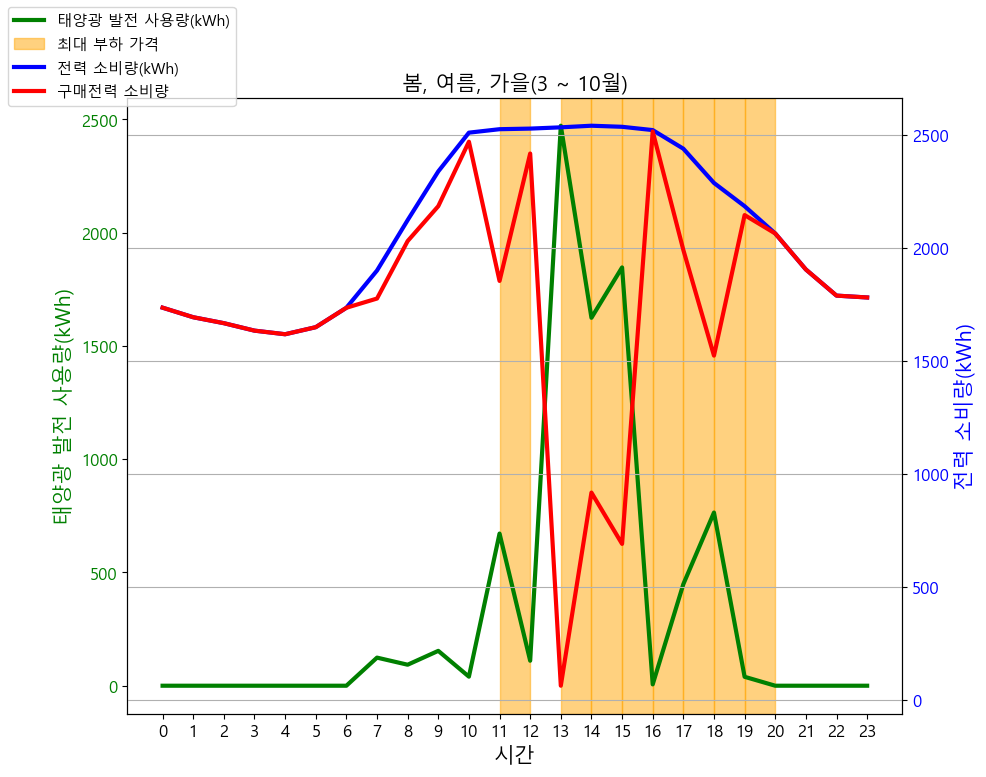

In [60]:
fig, ax1 = plt.subplots(figsize=(10, 8))

ax1.set_xlabel('시간', fontsize=15)
ax1.set_ylabel('태양광 발전 사용량(kWh)', color='g', fontsize=15)
ax1.plot(hourly_gen_used_normal, color='g', label='태양광 발전 사용량(kWh)', linewidth = 3)
ax1.tick_params(axis='y', labelcolor='g', labelsize=12)
ax1.set_xticks(np.arange(0, 24, 1))
ax1.set_xticklabels(np.arange(0, 24, 1), fontsize=12)
ax1.set_title('봄, 여름, 가을(3 ~ 10월)', fontsize=15)

ax2 = ax1.twinx()

ax2.set_ylabel('전력 소비량(kWh)', color='b', fontsize=15)
ax2.plot(qq, color='b', label='전력 소비량(kWh)', linewidth = 3)
ax2.tick_params(axis='y', labelcolor='b', labelsize=12)

plt.plot(qq-hourly_gen_used_normal, color='r', label='구매전력 소비량', linewidth = 3)

for i in time:
    if i == time[-1]:
        ax1.axvspan(i, i+1, alpha=0.5, color='orange', label='최대 부하 가격')
    else:
        ax1.axvspan(i, i+1, alpha=0.5, color='orange')
    

fig.legend(loc='upper left', fontsize = 11)
plt.grid(True)
plt.show()


pd.DataFrame([ee, qq, hourly_gen_used_normal, pos_normal, qq-hourly_gen_used_normal, np.array(winter_price), np.array(normal_price), np.array(summer_price)], 
             index=['실제 발전량','실제 전력 사용량','발전 사용량', '구매 사용량', '구매전력 소비량', '겨울 전력 가격', '봄 가을 전력 가격', '여름 전력 가격']).T.to_csv('total_info.csv', index=True, encoding='cp949')

In [65]:
import 

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement cbcpy (from versions: none)
ERROR: No matching distribution found for cbcpy


In [ ]:
from pyomo.environ import *

def minimize_cost(power_generation, power_usage, power_price):
    model = ConcreteModel()

    hours = range(24)

    # 변수: 각 시간대별 태양광 발전량
    model.x = Var(hours, within=NonNegativeReals)

    # 제약 조건
    model.constraints = ConstraintList()

    # 각 시간대별로 태양광 발전량이 전력 사용량을 초과하지 않아야 함
    for hour in hours:
        model.constraints.add(expr=model.x[hour] <= min(power_generation[hour], power_usage[hour]))
    
    # 태양광 발전량의 총합이 전체 전력 사용량을 초과할 수 없음
    model.constraints.add(expr=sum(model.x[hour] for hour in hours) <= sum(power_usage[hour] for hour in hours))

    # 목적 함수: 전력 가격과 전력 사용량의 차이를 최소화
    model.cost = Objective(expr=sum((power_usage[hour] - model.x[hour]) * power_price[hour] for hour in hours))

    # Solver 설정 및 최적화
    solver = SolverFactory('cbc')
    solver.solve(model)

    # 결과 출력
    optimal_generation = [value(model.x[hour]) for hour in hours]
    optimal_cost = value(model.cost)

    return optimal_generation, optimal_cost

# 예시 사용
power_generation = ee  # 시간당 태양광 발전량 리스트
power_usage = qq  # 시간당 전력 사용량 리스트
power_price = winter_price  # 시간당 전력 가격 리스트

n_particles = 10  # 파티클 개수
optimal_costs = minimize_cost(power_generation, power_usage, power_price)
print(optimal_costs)
